In [1]:
import pandas as pd
import datetime
pd.options.display.mpl_style = 'default'
%matplotlib inline

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2882: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sentiment_data = pd.read_csv('/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/sentiment_aapl.csv')

In [5]:
stock_data = pd.read_csv('/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/stockdata_aapl.csv')

In [6]:
stock_data.columns

Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Ex-Dividend',
       u'Split Ratio', u'Adj. Open', u'Adj. High', u'Adj. Low', u'Adj. Close',
       u'Adj. Volume'],
      dtype='object')

In [7]:
stock_data_adj = stock_data[stock_data.columns[8:]]

In [8]:
renames = dict(zip(list(stock_data.columns[8:]), list(stock_data.columns[1:6])))

In [9]:
stock_data_adj.rename(columns=renames, inplace=True)

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [10]:
stock_data_adj['Date'] = stock_data.Date

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
stock_data_adj.index = stock_data_adj.Date

In [12]:
stock_data_adj.drop(['Date'], axis=1, inplace=True)

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
sentiment_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
sentiment_data.index = sentiment_data.timestamp

In [15]:
#sentiment_data.drop(['timestamp'], axis=1, inplace=True)
sentiment_data.iloc[-1]

timestamp    2016-01-06
sentidx         7.43985
ticker             aapl
Name: 2016-01-06, dtype: object

In [16]:
indicators = [
    'SMA',
    'EMA',
    'MACD',
    'STOCH',
    'RSI',
    'ADX',
    'BBANDS'
]

In [17]:
path = '/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/'

In [18]:
df_dict = {}
for i in indicators:
    df  = pd.read_csv(path + i + '.csv')
    df_dict[i] = df

In [19]:
def clean_data(df):
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df.timestamp = pd.to_datetime(df.timestamp)
    df.index = df.timestamp
    df = df[(df['timestamp'] >= datetime.date(2012, 10,15)) & (df['timestamp'] <= datetime.date(2016,1,6))]
    df.drop(['timestamp'], axis=1, inplace=1)
    return df

In [20]:
for k, v in df_dict.iteritems():
    df_dict[k] = clean_data(v)

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
for k, v in df_dict.iteritems():
    print len(v.index)

1179
1179
1179
1179
1179
1179
1179
1179


In [24]:
df_dict['BBANDS'] = df_dict['BBANDS'][['Real Middle Band']]
df_dict['MACD'] = df_dict['MACD'][['MACD']]

In [25]:
df_dict['BBANDS'].rename(columns={'Real Middle Band' : 'BBANDS'}, inplace=True)

In [ ]:
for k, v in df_dict.iteritems():
    v.plot(figsize=(15,12))

In [164]:
sentiment_data.drop(['ticker'], axis=1, inplace=True)

In [22]:
df_dict.update({'SENTIDX' : sentiment_data})

In [41]:
df_dict['SENTIDX'] = df_dict['SENTIDX'].rename(columns={'sentidx' : 'SENTIDX'})

In [47]:
df_dict['STOCKPRICE'].index = df_dict['STOCKPRICE']['Date']

In [61]:
df_dict['STOCKPRICE'].rename(columns={'Date' : 'timestamp'}, inplace=True)

In [66]:
df_dict['STOCKPRICE'].head()

,Open,High,Low,Close,Volume
timestamp,,,,,
2012-10-15,81.612726,81.971520,80.515694,81.923767,108125500.0
2012-10-16,81.998623,83.929399,81.438491,83.863900,137442900.0
2012-10-17,83.744840,84.250765,83.116305,83.195498,97259400.0
2012-10-18,82.547139,82.865923,81.309429,81.650154,119156100.0
2012-10-19,81.444944,81.537869,78.679133,78.707527,186021500.0


In [67]:
df_dict.keys()

['EMA', 'RSI', 'BBANDS', 'SENTIDX', 'ADX', 'MACD', 'SMA', 'STOCKPRICE']

In [ ]:
finaldf = reduce(lambda left,right: pd.merge(left,right,on='name'), df_dict.)

In [76]:
index = df_dict['SENTIDX'].index
for k, df in df_dict.items():
    if k not in ['SENTIDX']:
        df_dict[k] = df_dict[k].reindex(index.union(df_dict[k].index))

In [72]:
for k,df in df_dict.items():
    df = df.dropna()
    df_dict[k] = df

In [74]:
for k,df in df_dict.items():
    df.index = pd.to_datetime(df.index)
    df_dict[k] = df

In [78]:
for k, df in df_dict.items():
    if k not in ['SENTIDX']:
        cols = df.columns
        for col in cols:
            df[col] = df[col].interpolate(method='time')
        df_dict[k] = df

In [80]:
for k, df in df_dict.items():
    print df.isnull().any().any()

False
False
False
False
False
False
False
False


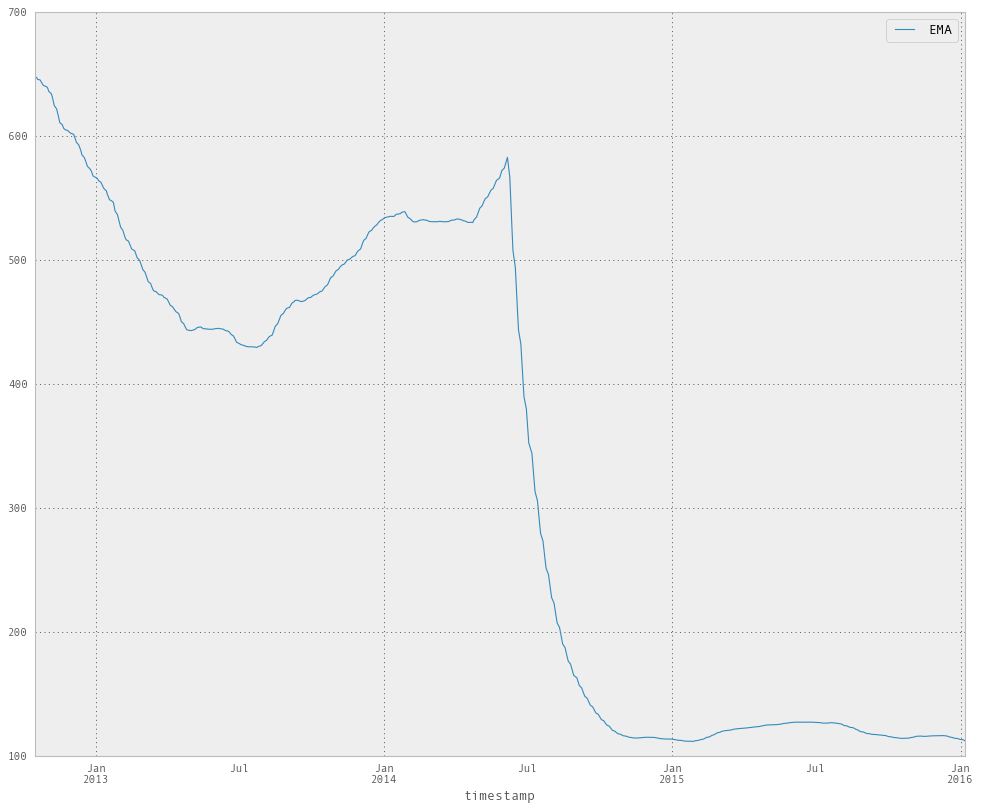

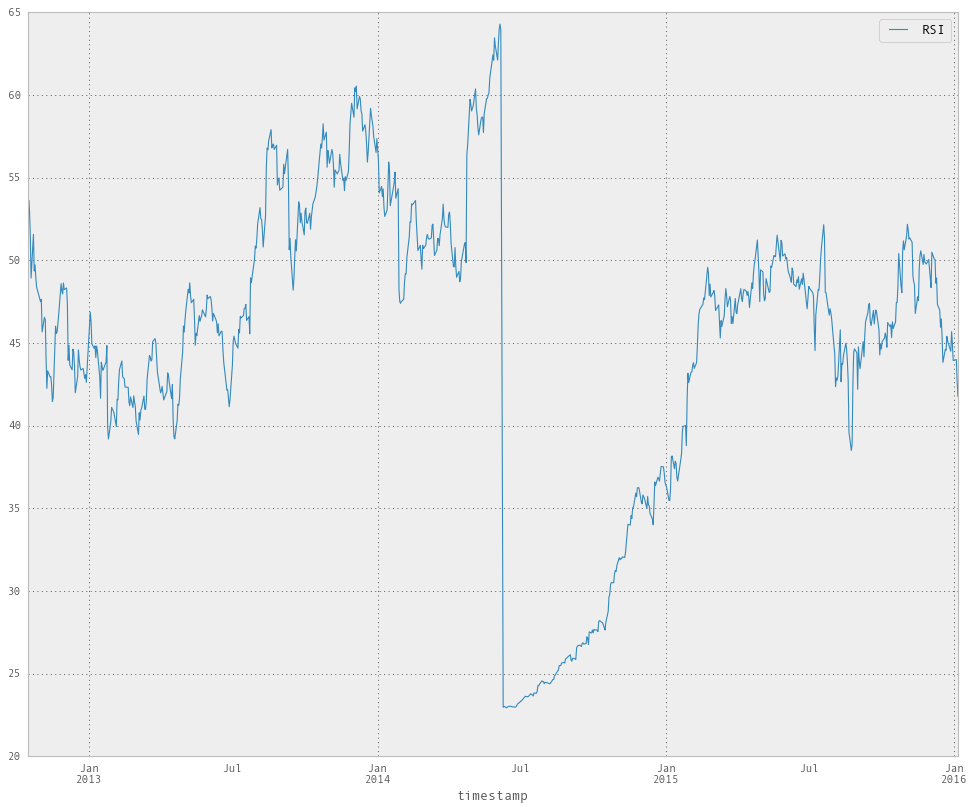

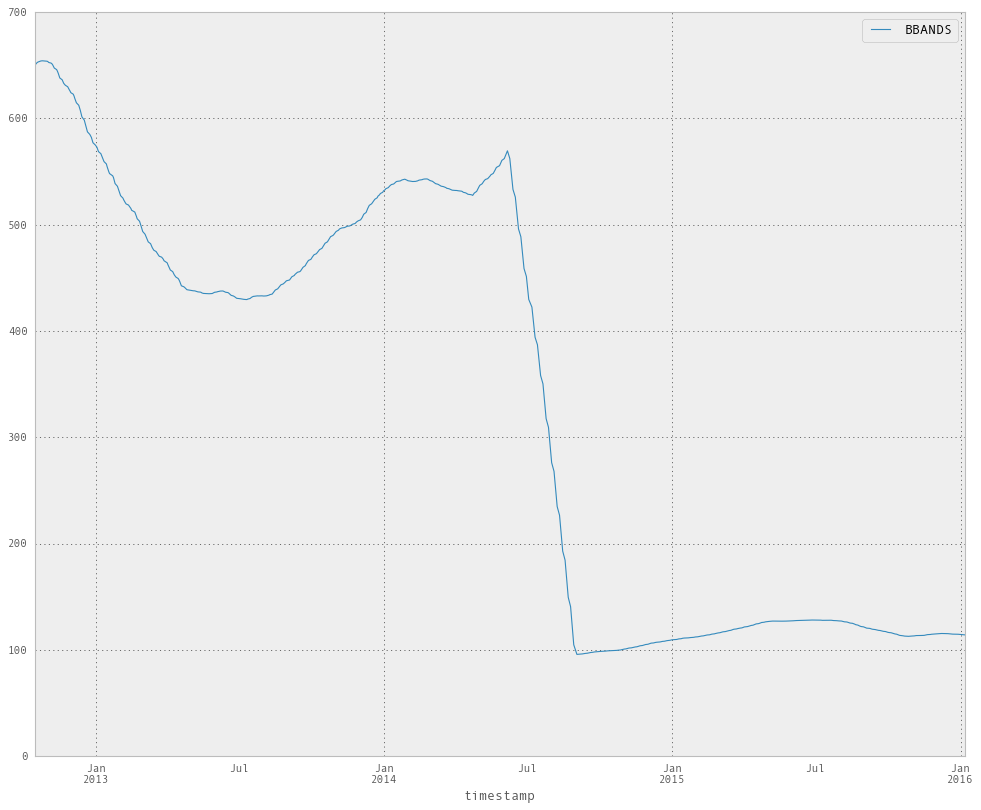

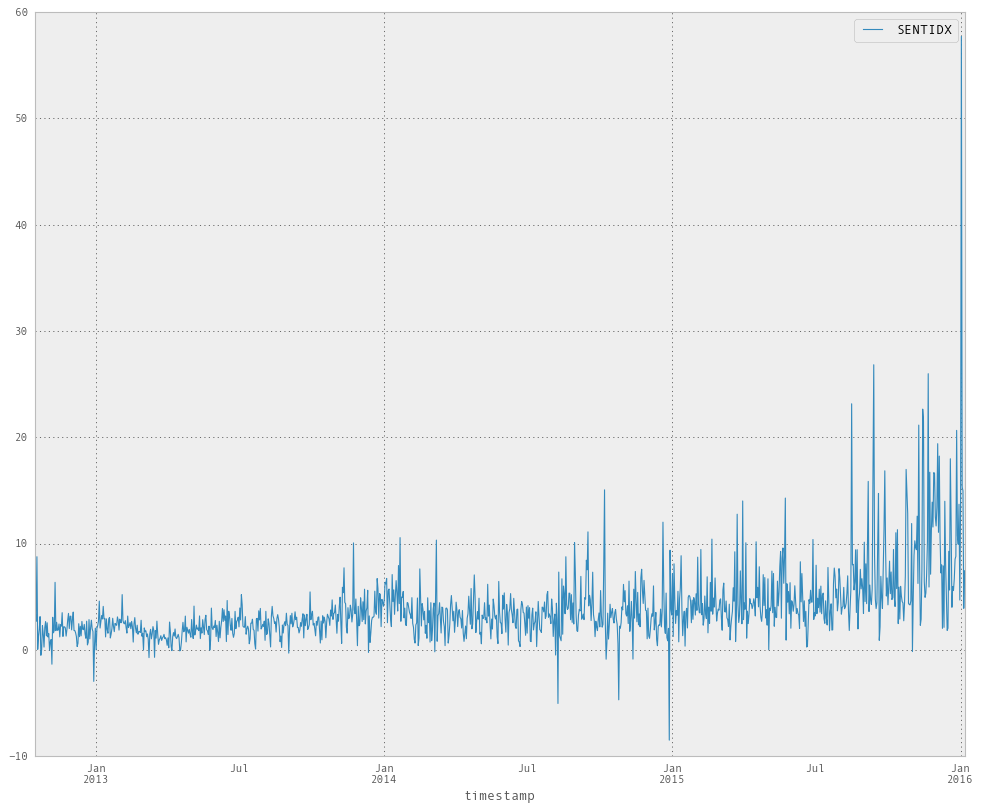

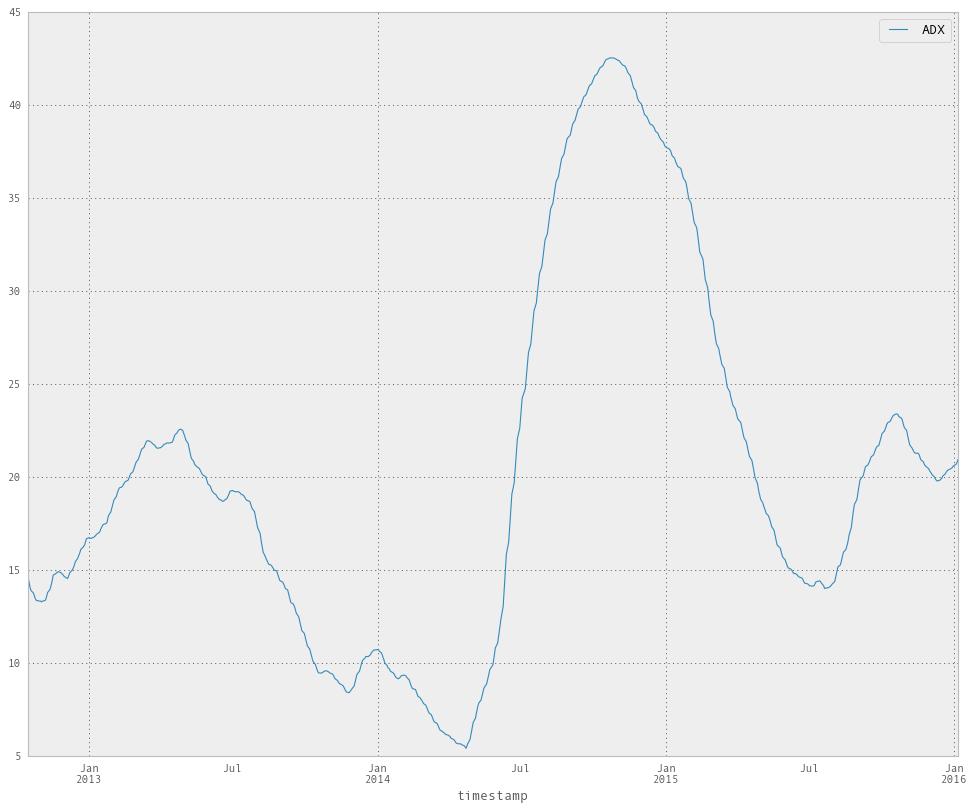

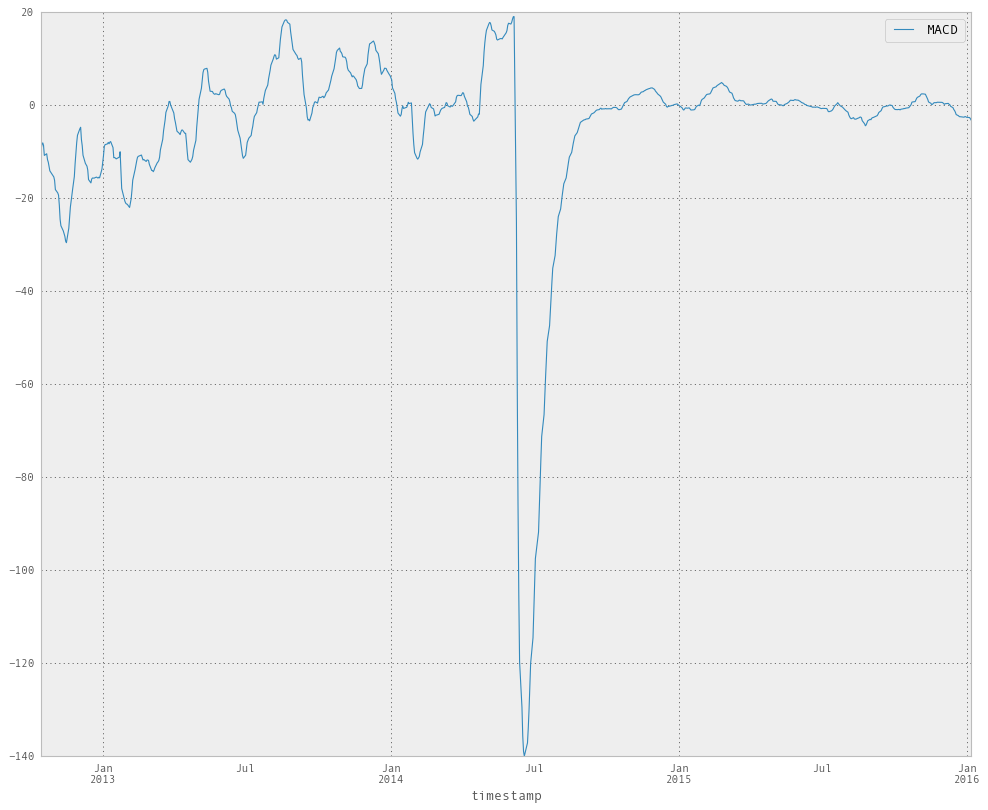

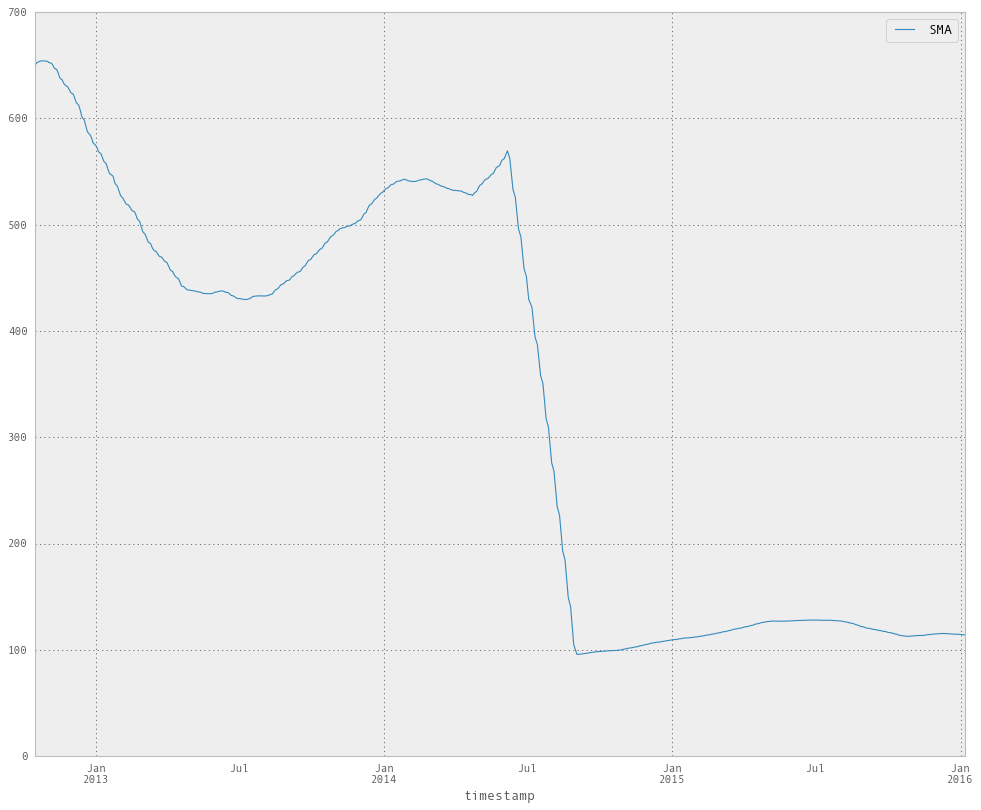

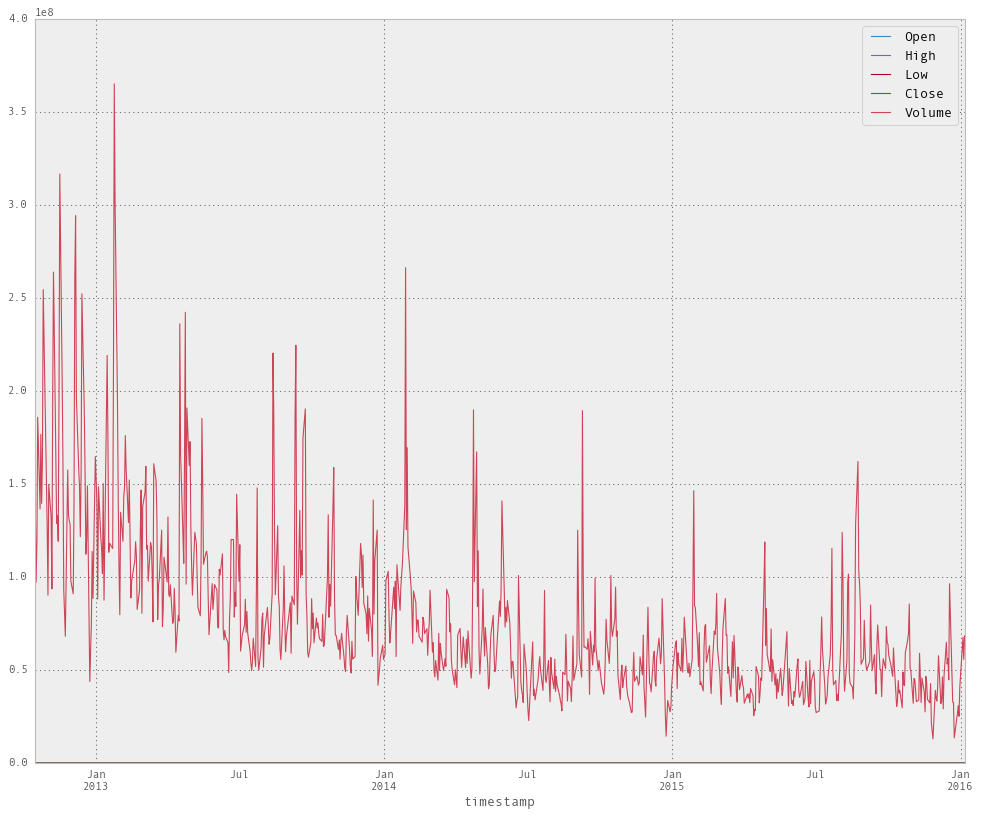

In [83]:
for k, df in df_dict.items():
    try:
        #print df.head()
        df.plot(figsize=(15,12))
    except Exception as e:
        print e

In [84]:
dflist = df_dict.values()

In [89]:
def reducef(df1, df2):
    print type(df1)
    print type(df2)
    return df1.merge(df2, how='outer', left_index=True, right_index=True)

In [91]:
from functools import reduce
dfmerged = reduce(reducef, dflist)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [104]:
dfmerged.head(10)

,EMA,RSI,BBANDS,SENTIDX,ADX,MACD,SMA,Open,High,Low,Close,Volume
timestamp,,,,,,,,,,,,
2012-10-15,647.4854,51.9578,649.9403,7.172811,14.674700,-9.399200,649.9403,81.612726,81.971520,80.515694,81.923767,1.081255e+08
2012-10-16,647.5611,53.6283,650.7063,3.546234,14.442400,-8.493400,650.7063,81.998623,83.929399,81.438491,83.863900,1.374429e+08
2012-10-17,647.4644,52.9828,651.4346,2.691063,14.224200,-8.100100,651.4346,83.744840,84.250765,83.116305,83.195498,9.725940e+07
2012-10-18,646.9784,51.5248,652.3957,8.766242,14.022600,-8.654800,652.3957,82.547139,82.865923,81.309429,81.650154,1.191561e+08
2012-10-19,645.7607,48.9179,652.9784,0.050921,13.903300,-10.809500,652.9784,81.444944,81.537869,78.679133,78.707527,1.860215e+08
2012-10-20,645.6325,49.7993,653.2499,1.280792,13.859067,-10.687967,653.2499,80.643466,81.693175,78.728177,79.748202,1.695752e+08
2012-10-21,645.5043,50.6807,653.5214,1.966257,13.814833,-10.566433,653.5214,79.841987,81.848480,78.777221,80.788876,1.531290e+08
2012-10-22,645.3761,51.5621,653.7929,3.130212,13.770600,-10.444900,653.7929,79.040508,82.003785,78.826264,81.829551,1.366827e+08
2012-10-23,644.3262,49.3421,654.0983,-0.508431,13.640100,-11.689400,654.0983,81.438491,81.812773,78.947583,79.161234,1.767864e+08


In [103]:
dfmerged.describe()

,EMA,RSI,BBANDS,SENTIDX,ADX,MACD,SMA,Open,High,Low,Close,Volume
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1.179000e+03
mean,332.849619,45.006467,333.385095,3.903623,20.251436,-4.785198,333.385095,87.134754,87.936222,86.261367,87.100047,7.709930e+07
std,193.761282,9.315510,198.349459,3.573434,9.956991,20.787668,198.349459,23.077050,23.238477,22.863862,23.061460,4.420658e+07
min,111.949700,22.927400,95.768700,-8.492248,5.425400,-139.993100,95.768700,50.594952,52.111614,50.220677,50.928800,1.304644e+07
25%,121.845667,41.788800,117.289200,2.083522,13.857200,-4.756700,117.289200,66.940000,67.645773,66.474695,67.264367,4.759360e+07
50%,432.071300,46.749500,433.033400,3.130212,18.990600,-0.338233,433.033400,83.744840,84.250765,83.116305,83.905451,6.436920e+07
75%,521.874500,50.722025,521.932800,4.616411,22.991712,2.125800,521.932800,108.405493,109.888669,107.478723,108.744376,9.341745e+07
max,647.561100,64.277800,654.244900,57.715096,42.542400,19.050800,654.244900,128.233349,128.314416,125.839962,126.931724,3.652131e+08


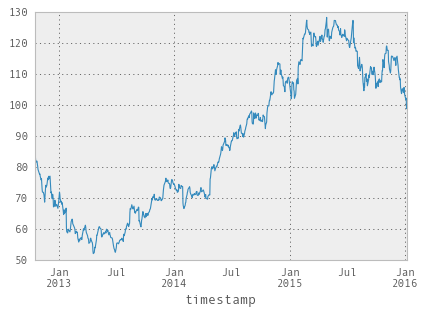

In [101]:
dfmerged['High'].plot()

In [106]:
dfmerged.to_csv('/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/final_merged_dataset.csv')